# Testing the model inference

In [1]:
import requests

SERVER_URL = "http://localhost:8000"

def get_root():
    response = requests.get(f"{SERVER_URL}/")
    return response.json()

print(get_root())

{'Hello': 'world'}


In [3]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

data_train = f"{path}/mnist_train.csv"
df_train = pd.read_csv(data_train)

/home/sohyla/depi_deployment/digits_recognition/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


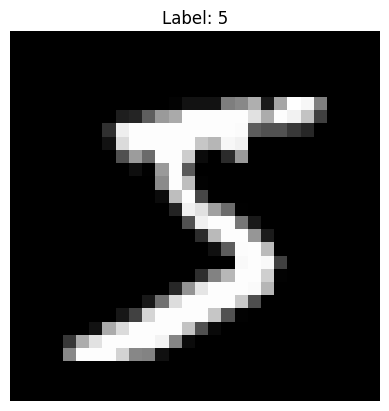

In [4]:
# visualize a sample
import matplotlib.pyplot as plt

def plot_sample(df):
    plt.imshow(df.iloc[0, 1:].values.reshape(28, 28), cmap="gray")
    plt.title(f"Label: {df.iloc[0, 0]}")
    plt.axis("off")
    plt.show()
plot_sample(df_train)

In [5]:
def predict_digit(image_data):
    image_list = image_data.flatten().tolist()
    payload = {"image_data": image_list}
    response = requests.post(f"{SERVER_URL}/predict/", json=payload)
    return response.json()

print(predict_digit(df_train.iloc[0, 1:].values))

{'predictions': 5}
